# Numerical Solution to Inverse Laplace Transform (ILT) with PINN

## Problem Definition
### Laplace Transform
Laplace transform (LT) is a powerful integral transform in mathematics and engineering to convert a function of time (denoted as $f(t)$) in a function of complex variables (denoted as $F(s)$). this transform simplifies the process of solving differential equations by converting them into algebraic equations.

The Laplace transform $\mathfrak{L}\{f(t)\}=F(s)$ is defined as 
$$
F(s) = \int_{0}^{\infty}e^{-st}f(t)dt
$$

where
- $t$ is the time variable
- $s$ is a complex number frequency parameter $s=\sigma+j\omega$
- $f(t)$ is the original time domain function
- $F(s)$ is the Laplace transformed function in $s$ domain

### Inverse Laplace Transform
The inverse Laplace transform is the process of converting a function $F(s)$ back into its original time domain form $f(t)$. The inverse is denoted as $\mathfrak{L}^{-1}\{F(s)\}=f(t)$.

The inverse Laplace transform is defined as:
$$
f(t)=\mathfrak{L}^{-1}(F(s))=\frac{1}{x\pi j}\lim_{T\to\infty}\int_{\gamma-jT}^{\gamma+jT}e^{st}F(s)ds
$$

where 
- The contour of the integral is a vertical line on the complex plane, often referred to as the Bromwich integral.
- $\gamma$ is a real number such that all singularity of $F(s)$ are to the left of the line $\Re(s)=\gamma$.

## Simple Example

Here we first demonstrate the possibility of using PINN to solve ILT problem over function $f(t)=sin(t)$. Analytical form of the LT is $F(s)=\frac{1}{s^2+1}.

Let begin with function plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

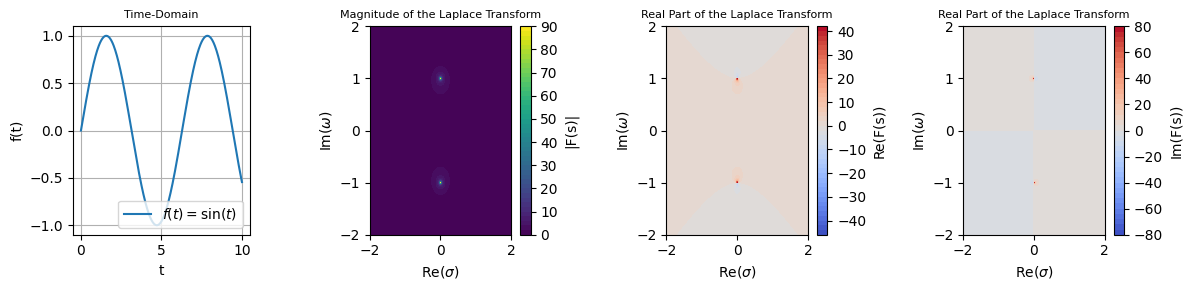

In [28]:
# Define the time-domain function f(t) = sin(t)
def f(t):
    return np.sin(t)

# Define the Laplace transform of sin(t)
def F(s):
    return 1/(s**2+1)

fig, axs = plt.subplots(1,4,figsize=(12, 3))

# Create a range of t values
t_values = np.linspace(0, 10, 400)
f_values = f(t_values)

# Plot the original function f(t) = sin(t)
axs[0].plot(t_values, f_values, label=r'$f(t) = \sin(t)$')
axs[0].set_xlabel('t')
axs[0].set_ylabel('f(t)')
axs[0].set_title('Time-Domain', fontsize = 8)
axs[0].legend(loc='lower right')
axs[0].grid(True)

# Create a grid in the complex plane
sigma = np.linspace(-2, 2, 400)
omega = np.linspace(-2, 2, 400)
sigma, omega = np.meshgrid(sigma, omega)
s = sigma + 1j * omega

# Compute the Laplace transform on the grid
F_s = F(s)

# Plot the magnitude of the Laplace transform

c = axs[1].contourf(sigma, omega, np.abs(F_s), levels=50, cmap='viridis')
plt.colorbar(c,ax=axs[1],label='|F(s)|')
axs[1].set_xlabel(r'Re($\sigma$)')
axs[1].set_ylabel(r'Im($\omega$)')
axs[1].set_title(r'Magnitude of the Laplace Transform', fontsize = 8)

# Plot the real part of the Laplace transform
c= axs[2].contourf(sigma, omega, np.real(F_s), levels=50, cmap='coolwarm')
plt.colorbar(c,ax=axs[2],label='Re(F(s))')
axs[2].set_xlabel(r'Re($\sigma$)')
axs[2].set_ylabel(r'Im($\omega$)')
axs[2].set_title(r'Real Part of the Laplace Transform', fontsize = 8)

# Plot the imaginary part of the Laplace transform
c= axs[3].contourf(sigma, omega, np.imag(F_s), levels=50, cmap='coolwarm')
plt.colorbar(c,ax=axs[3],label='Im(F(s))')
axs[3].set_xlabel(r'Re($\sigma$)')
axs[3].set_ylabel(r'Im($\omega$)')
axs[3].set_title(r'Real Part of the Laplace Transform', fontsize = 8)
plt.tight_layout()